<a href="https://colab.research.google.com/github/ayush2444/LetsGrowMore-Internship-/blob/main/Develop_A_Neural_Network_That_Can_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Let's Grow More Data Science Virtual Internship Program July 2023

###BY: Ayush shrivastava
###ADVANCED LEVEL TASK

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
#loading dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


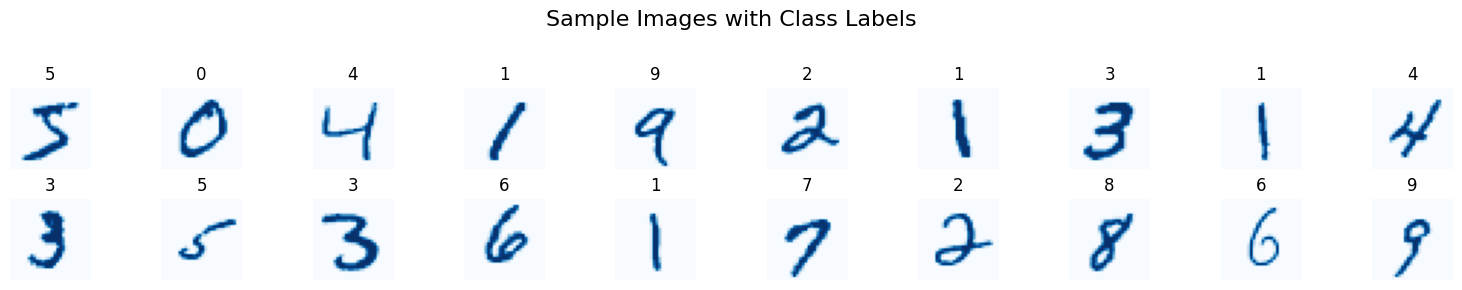

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(15, 3))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])
    ax.axis('off')  # Turn off axis to remove ticks and labels

plt.suptitle('Sample Images with Class Labels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Add a title above subplots and adjust spacing
plt.subplots_adjust(wspace=0.4)  # Adjust horizontal spacing between subplots
plt.show()


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

3

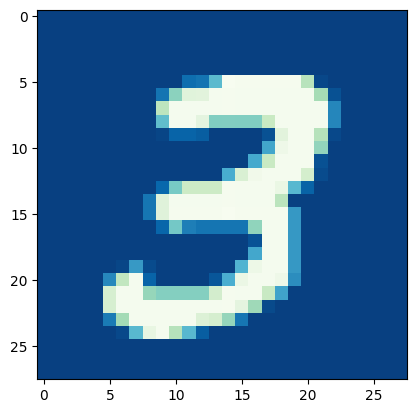

In [ ]:
plt.imshow(x_train[7], cmap='GnBu_r')
y_train[10]

In [ ]:
# Pre-processing the data
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

In [ ]:
y_cat_train = keras.utils.to_categorical(y_train, num_classes=10)
y_cat_test = keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Model

# Assuming you have defined num_classes and input_shape elsewhere in your code
# num_classes = ...  # Number of output classes for the classification task
# input_shape = ...  # Input shape of your images (e.g., (width, height, channels))

# Define the input layer
inputs = Input(shape=input_shape)

# First Convolutional Block
x = Conv2D(128, kernel_size=(3, 3), activation=tf.nn.relu)(inputs)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Second Convolutional Block
x = Conv2D(64, (3, 3), activation=tf.nn.relu)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Third Convolutional Block
x = Conv2D(32, (3, 3), activation=tf.nn.relu)(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# MaxPooling Layer
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Flatten Layer
x = Flatten()(x)

# Fully Connected Layers
x = Dense(128, activation=tf.nn.relu)(x)
x = Dropout(0.3)(x)

# Output Layer
outputs = Dense(num_classes, activation=tf.nn.softmax)(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                             

In [ ]:
# Train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=5)

Epoch 1/5
1688/1688 [==============================] - 836s 494ms/step - loss: 0.2493 - accuracy: 0.9272 - val_loss: 0.1150 - val_accuracy: 0.9752
Epoch 2/5
1688/1688 [==============================] - 815s 483ms/step - loss: 0.1059 - accuracy: 0.9690 - val_loss: 0.0969 - val_accuracy: 0.9783
Epoch 3/5
1688/1688 [==============================] - 813s 482ms/step - loss: 0.0872 - accuracy: 0.9754 - val_loss: 0.0867 - val_accuracy: 0.9842
Epoch 4/5
1688/1688 [==============================] - 812s 481ms/step - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.1345 - val_accuracy: 0.9817
Epoch 5/5
1688/1688 [==============================] - 811s 480ms/step - loss: 0.0608 - accuracy: 0.9825 - val_loss: 0.0953 - val_accuracy: 0.9870


In [ ]:
ypred = model.predict(x_test)

313/313 [==============================] - 32s 102ms/step


###Evaluate the Model

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 29s 91ms/step - loss: 3.4788 - accuracy: 0.9858
Test Loss: 3.478783130645752
Test Accuracy: 0.98580002784729


### Save and load the model

In [ ]:
model.save('DevelopNN.h5')
from tensorflow.keras.models import load_model
model = load_model('DevelopNN.h5')

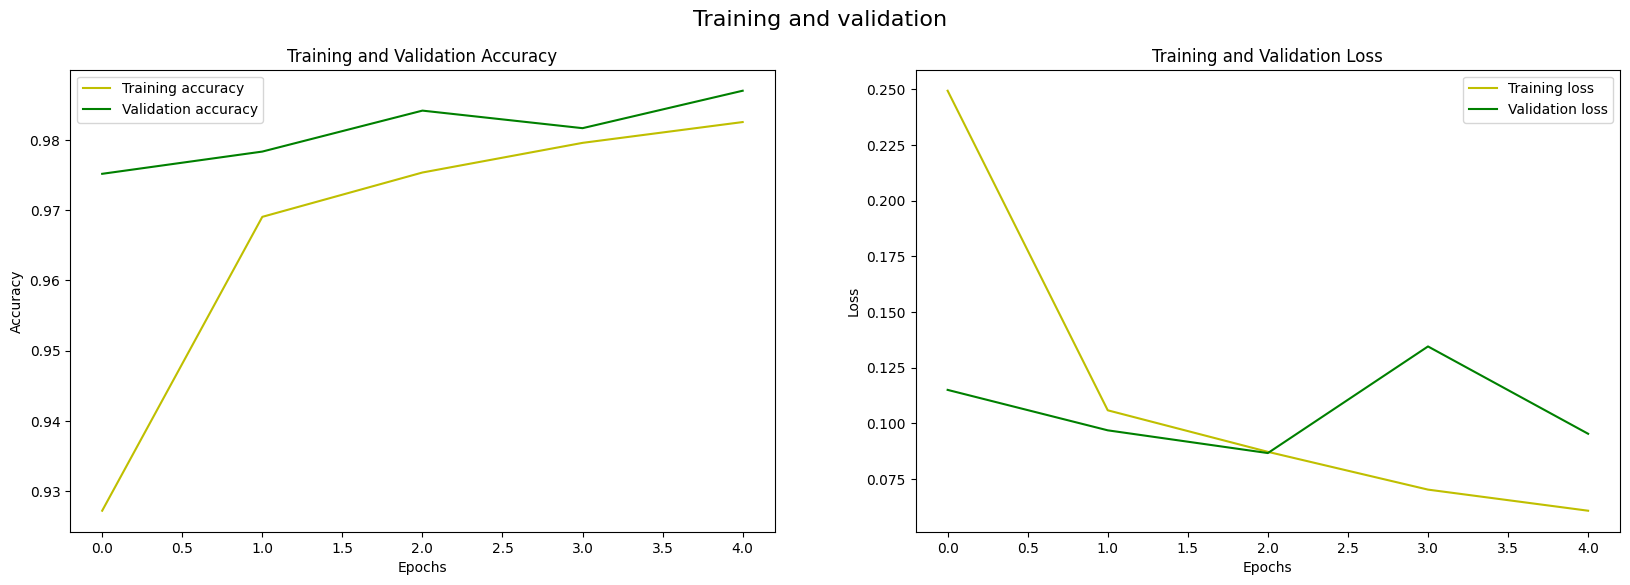

In [ ]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'y', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'g', label='Validation accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'y', label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.suptitle('Training and validation', fontsize=16)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
y_predicted_labels = np.argmax(y_predicted, axis=1)
cm = confusion_matrix(y_test, y_predicted_labels)


313/313 [==============================] - 34s 107ms/step


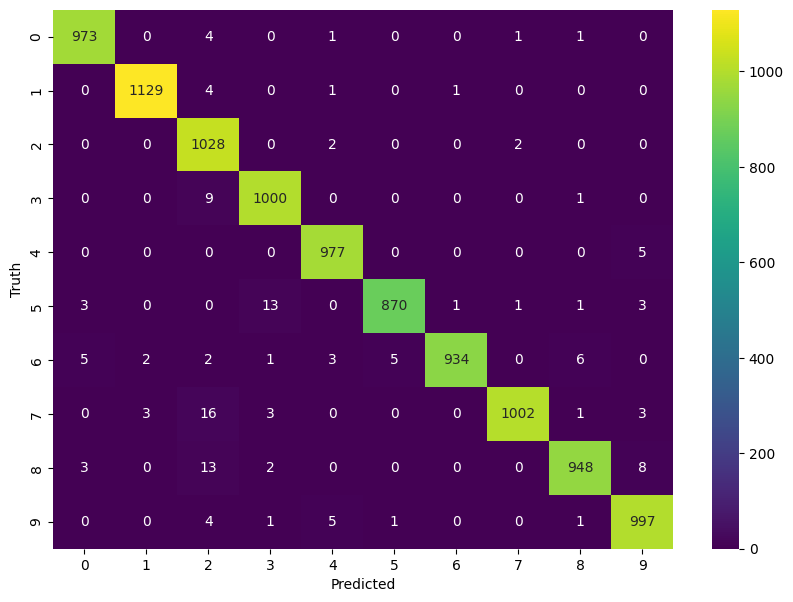

In [ ]:

fig, ax = plt.subplots(figsize=(10, 7))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=ax)
heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('Truth')

plt.show()


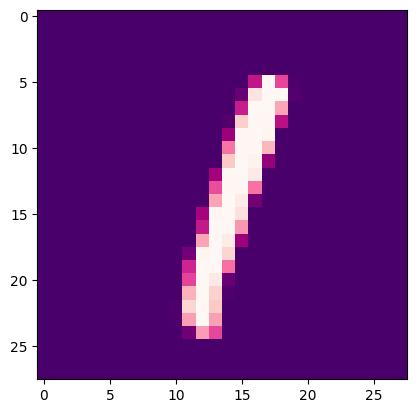

In [ ]:
plt.imshow(x_test[5],cmap='RdPu_r')

1/1 [==============================] - 0s 58ms/step
Predicted Value: 9
Successful prediction


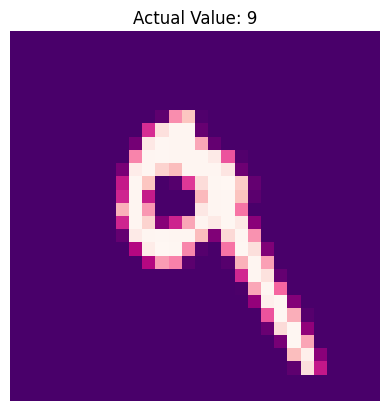

In [ ]:
def plot_and_evaluate_sample(x, y_true, model):
    prediction = model.predict(x)
    y_pred = np.argmax(prediction[0])

    plt.imshow(x[0], cmap='RdPu_r')
    plt.title(f'Actual Value: {y_true[0]}')
    plt.axis('off')

    print(f'Predicted Value: {y_pred}')
    if y_true[0] == y_pred:
        print('Successful prediction')
    else:
        print('Unsuccessful prediction')

# Assuming x_test[1] and y_test[1] are single samples
plot_and_evaluate_sample(x_test[7:8], y_test[7:8], model)
